# Recording With Your Microphone

Make sure you have followed the instructions in the [Microphone](https://github.com/LLCogWorks2018/Microphone) repository so that the code in this notebook will work!  

Your microphone stores the audio on buffer frames, which is just an area of RAM made for temporary storage. Buffers are typically used when there is a difference between the rate at which data is received and the rate at which it can be processed. More can be read about them [here](https://en.wikipedia.org/wiki/Data_buffer).

We are going to talk abut first obtaining the audio frames from the function of the microphone class called `record_audio` and then reading in the frames as numerical data. 

That is:

```python
from microphone import record_audio
listen_time = 5  # seconds
frames, sample_rate = record_audio(listen_time )
```
The `sample_rate` variable is the frequency at which the computer initially sampled the sound via the microphone which is stored because it will give us a corresponding time for each sampling which you can see in the last line of the code at the bottom of this cell.

The `frames` variable points to bytes in memory and we are going to read that memory expecting 16-bit integer-values. We will store these frames as NumPy arrays and combine them into a single array with the following two lines of code.

```python
# read in the recorded audio, saved as a numpy array of 16-bit integers
audio_data = np.hstack([np.frombuffer(i, np.int16) for i in frames])

# the corresponding time (sec) for each sample
time = np.arange(len(audio_data)) * sample_rate
```

Each frame (`for i in frames`) is being translated into a NumPy array of 16-bit integers via the function `np.frombuffer`
Because the microphone does not continuously record and has a break each time there is a new memory frame, the data needs to get concatenated using the horizontal stack function (placing the arrays end to end).

In [1]:
#Try running this to record audio for 5 seconds
from microphone import record_audio
listen_time = 5  # seconds
frames, sample_rate = record_audio(listen_time)

No microphone configuration file found, attempting to find default device..
Using input device 'Built-in Microphone'
Recording ended


In [2]:
# Run this to hear it!
from microphone import play_audio
play_audio(frames, listen_time)

In [4]:
# saving the digitizes audio data as a numpy array
import numpy as np
audio_data = np.hstack([np.frombuffer(i, np.int16) for i in frames])
time = np.arange(len(audio_data)) * sample_rate # corresponding time (sec) for each sample

<IPython.core.display.Javascript object>


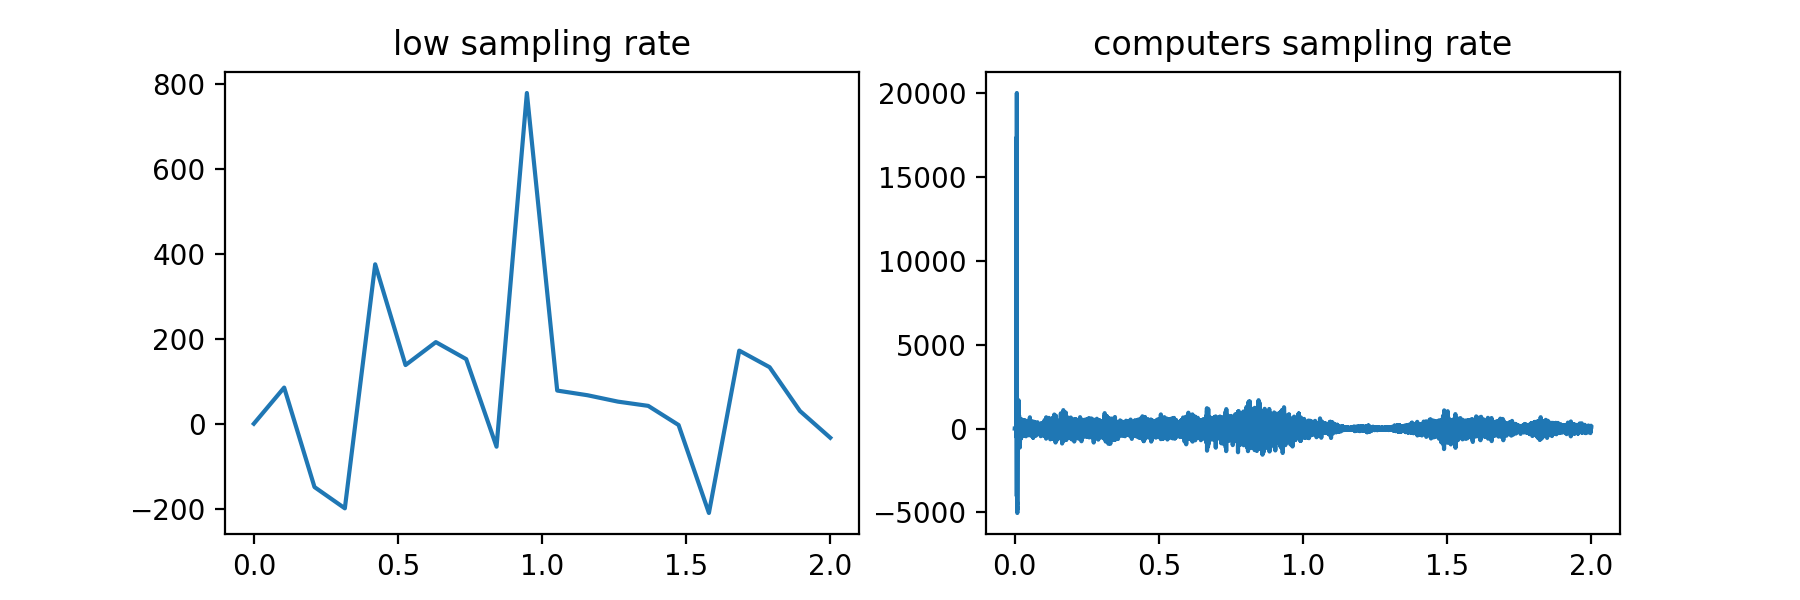

220160


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [6]:
# if this cell does not show anything, try running it again!
# If you get a deprecation warning, don't worry! This should not affect anything.
import matplotlib.pyplot as plt
%matplotlib notebook

audio_data = np.hstack([np.frombuffer(i, np.int16) for i in frames])
time = np.arange(len(audio_data)) * sample_rate # corresponding time (sec) for each sample

fix, axs = plt.subplots(1, 2, figsize = (9,3))
x = np.linspace(0, 2, 2 * sample_rate / (sample_rate / 10))
print(len(audio_data))
y = audio_data[:2*sample_rate]
y = y[::int(sample_rate / 10)]

axs[0].plot(x,y);
axs[0].set_title('low sampling rate');
axs[1].plot(np.linspace(0,2,2*sample_rate), audio_data[:2*sample_rate]);
axs[1].set_title( 'computers sampling rate');